# <strong> SMS Spam Detection using different algorithms (Logistic Regression, Support Vector Machine, Naive Bayes Classifier and K-Nearest Neighbors)</strong>

## <strong>Description</strong>

The Dataset is downloaded from the UCI Machine Learning repository. The first column specifies whether the message is “spam” or “ham”. Here, “spam” means unsolicited message, and “ham” means normal message. The second column contains the actual textual message. The last three columns contain the NAN values. The attributes are named – [v1, v2, Unnamed: 2, Unnamed: 3, Unnamed: 4]

In [ ]:
# importing Numpy and Pandas libraries
import numpy as np
import pandas as pd

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/spam11.csv')

In [ ]:
# displays any 5 rows of the dataframe.
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1377,spam,Double Mins & Double Txt & 1/2 price Linerenta...,NaN,NaN,NaN
741,ham,Do well :)all will for little time. Thing of g...,NaN,NaN,NaN
2239,ham,Every day i use to sleep after &lt;#&gt; so ...,NaN,NaN,NaN
261,ham,Anyway i'm going shopping on my own now. Cos m...,NaN,NaN,NaN
424,ham,Send this to ur friends and receive something ...,NaN,NaN,NaN


In [ ]:
# displays the shape of the data
df.shape

(5572, 5)

In [ ]:
# displays the first 5 rows of the data
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# displays the last 5 rows of the data
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


Various steps to be performed:

 1. Data cleaning
 2. EDA
 3. Text Preprocessing
 4. Text Vectorization
 5. Model building
 6. Evaluation
 7. Hyperparameter Tuning
 8. Prediction

## <strong> 1. Data Cleaning

In [ ]:
# used to print a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# used to generate descriptive statistics of the Dataframe.
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# clearly, there are 2 unique values in v1 - ham (0) and spam (1) and 403 duplicates in v2.

In [ ]:
# dropping the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2347,ham,But i dint slept in afternoon.
3730,ham,Isn't frnd a necesity in life? imagine urself ...
4449,ham,"Awesome, be there in a minute"
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No..."
136,ham,He is there. You call and meet him


In [ ]:
# renaming the columns using dictionary
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1404,ham,Actually getting ready to leave the house.
1846,ham,Its on in engalnd! But telly has decided it wo...
3836,ham,Early bird! Any purchases yet?
4765,ham,Whens your radio show?
286,ham,Ok..


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

In [ ]:
# Fits the label encoder on the data column and returns encoded labels.

In [ ]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

Spam ---> 1


Ham ---> 0

In [ ]:
# transform the values in the target column of the dataframe.
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# checking for duplicate values
df.duplicated().sum()

403

In [ ]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
403+5169

5572

## <strong> 2. Exploratory Data Analysis

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#displays the count of Ham and Spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

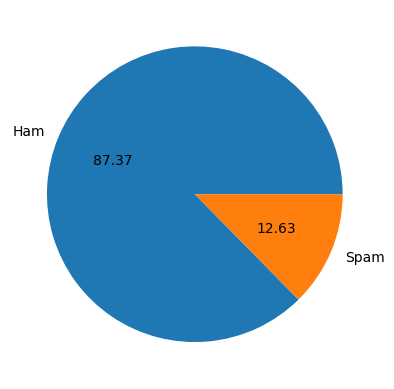

In [ ]:
#importing matplotlib

import matplotlib.pyplot as plt

#This code will create and display a pie chart showing the percentage of "Ham" and "Spam"

plt.pie(df['target'].value_counts(), labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
#importing Natural Language Toolkit

import nltk

In [ ]:
#Installing nltk (Natural Language Toolkit)

!pip install nltk

In [ ]:
# downloading the punkt package
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#number of characters in each message
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [ ]:
#creating a new column and adding the number of characters in the column
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# tokenizing the message into words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [ ]:
# number of words in each message.
#creating a new column and adding the number of words in the column
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
print(df['num_words'])

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64


In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# number of sentences in each message.

df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [ ]:
#creating a new column and adding the number of sentences in the column

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describing the distribution of the num_characters, num_words, and num_sentences columns for only the rows in the dataframe where the target column has the value 0 (Ham)
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe() #list

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describing the distribution of the num_characters, num_words, and num_sentences columns for only the rows in the dataframe where the target column has the value 1 (Spam)
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# Observation: Spam messages are larger and have more number of characters, words and sentences.

In [ ]:
#importing seaborn library

import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

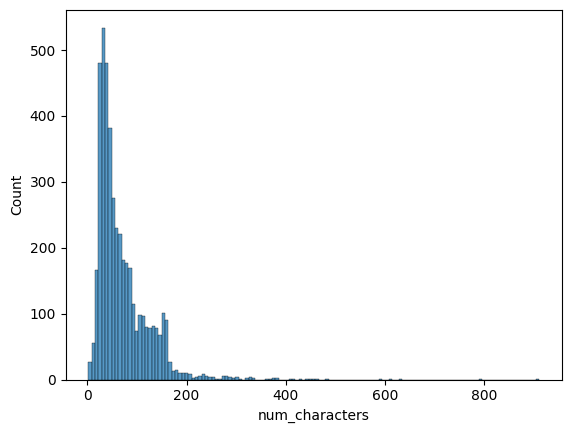

In [ ]:
#plotting a histogram for the column 'num_characters' for Ham.
sns.histplot(df[df['target'] == 0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

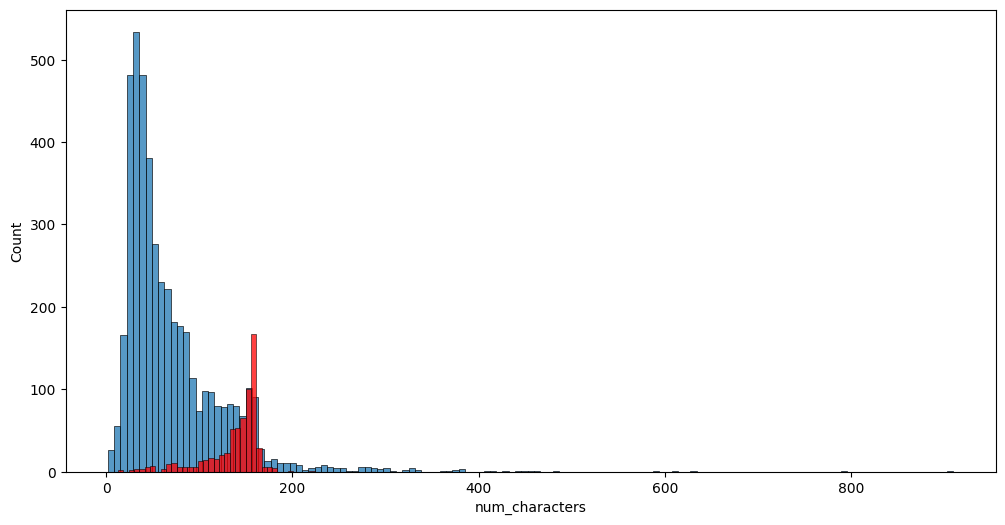

In [ ]:
#plotting a histogram for the column 'num_characters' for Ham and Spam.

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

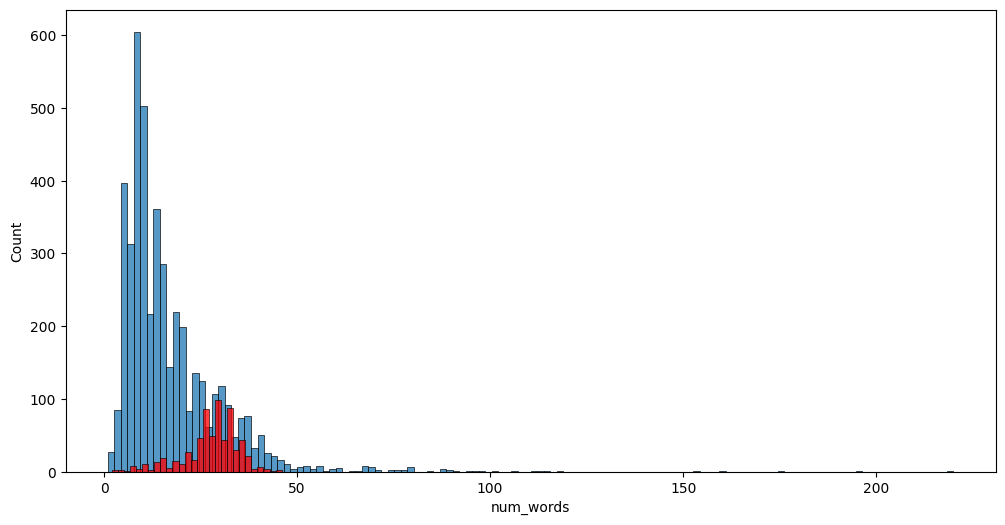

In [ ]:
#plotting a histogram for the column 'num_words' for Ham and Spam.

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

In [ ]:
#computes the correlation matrix for the numeric columns

df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

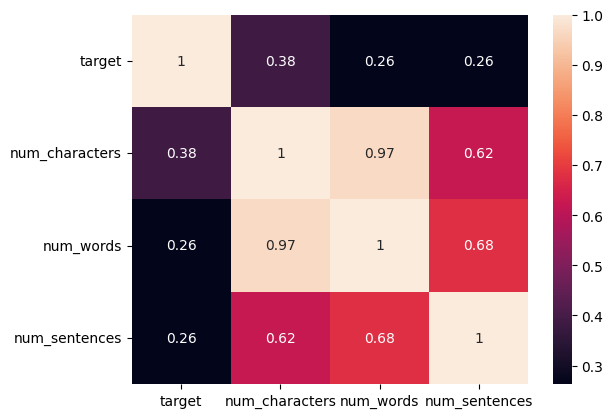

In [ ]:
#computes the correlation heatmap for the numeric columns

sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
# multicollinearity in data

## <strong> 3. Text Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
#The transform_text function takes a string as input and converts it into lowercase and tokenizes the sentences into words
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    return text

In [ ]:
transform_text('HI HELLO')

['hi', 'hello']

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

#Removes special characters
    y = [] #list
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [ ]:
transform_text('HI HELLO ##')

['hi', 'hello']

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#using a variable to store the stopwords in english

stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
#printing stopwords in english

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#importing the string module in Python

import string

In [ ]:
#string containing all the ASCII punctuation characters

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Import the PorterStemmer class from the nltk.stem.porter module
from nltk.stem.porter import PorterStemmer
# Initialize an instance of the PorterStemmer
ps = PorterStemmer()
# Use the stemmer to find the stem of the word 'acting'
stemmed_word = ps.stem('acting')
# Print the stemmed word (root form)
stemmed_word

'act'

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text_tokens = word_tokenize(text)

    # Initialize string to store tokens without special characters
    y = ""

    for token in text_tokens:
        if token.isalnum():
            y += token + " "

    # Initialize stopwords
    stop_words = stopwords.words('english')

    # Remove stopwords and punctuation
    filtered_tokens_without_stopwords = ""
    for token in y.split():
        if token not in stop_words and token not in string.punctuation:
            filtered_tokens_without_stopwords += token + " "

    # Initialize the stemmer
    ps = PorterStemmer()

    # Perform stemming
    stemmed_tokens = ""
    for token in filtered_tokens_without_stopwords.split():
        stemmed_tokens += ps.stem(token) + " "

    # Return the stemmed tokens as a single string
    return stemmed_tokens.strip()


In [ ]:
#printing the transformed text
transform_text('I am gonna be home soon and i dont want to talk about this stuff anymore tonight, k? Ive cried enough today.')

'gon na home soon dont want talk stuff anymor tonight k ive cri enough today'

In [ ]:
#storing the output in a new column 'transformed_text'
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Import the WordCloud class from the wordcloud module
from wordcloud import WordCloud

# Initialize a WordCloud object with specified parameters:
wc = WordCloud(
    width=500,  # Set the width of the word cloud image to 500 pixels
    height=500,  # Set the height of the word cloud image to 500 pixels
    min_font_size=10,  # Specify the minimum font size for words in the cloud
    background_color='white'  # Set the background color of the cloud to white
)

# At this point, the 'wc' variable holds a WordCloud object that can be used to generate
# word cloud images based on a given input text.


In [ ]:
# Generate a word cloud for spam messages

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

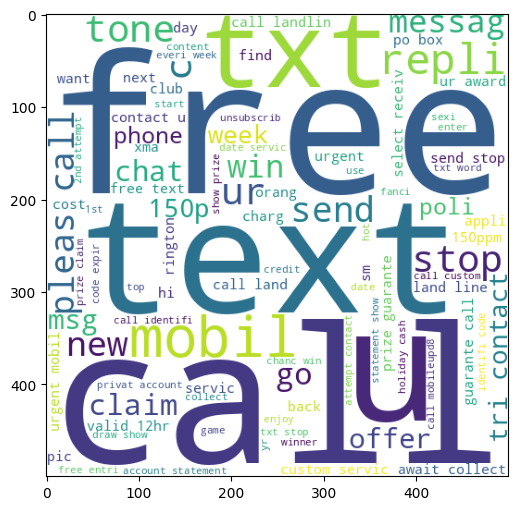

In [ ]:
#display the word cloud

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
# Generate a word cloud for ham messages

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

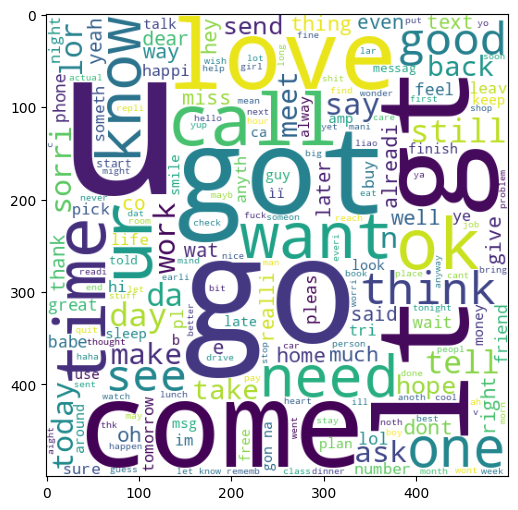

In [ ]:
#display the ham word cloud

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##<strong> 4. Text Vectorization

In [ ]:
# Importing the necessary classes for text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an instance of TfidfVectorizer with a maximum of 3000 features.
# TfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features.
# It gives more weight to the terms that are more unique to a document in the collection.
tfidf = TfidfVectorizer(max_features=3000)


##<strong>5. Model Building

In [ ]:
#storing the array in variable X

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Train test split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,recall_score,f1_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(classification_report(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(classification_report(y_test, y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
# tfidf --> MNB

## <strong> 6. Model Building and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [ ]:
clfs = {
    'SVC' : svc,
    'KNN' : knc,
    'NB': mnb,
    'LR': lrc,
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354,
 0.9747899159663865,
 0.8405797101449275,
 0.9027237354085604)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ", current_recall)
    print("F1 - ", current_f1)
    print("---------------------------")


    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
Recall -  0.8405797101449275
F1 -  0.9027237354085604
---------------------------
For  KNN
Accuracy -  0.9052224371373307
Precision -  1.0
Recall -  0.2898550724637681
F1 -  0.44943820224719105
---------------------------
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
Recall -  0.782608695652174
F1 -  0.878048780487805
---------------------------
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
Recall -  0.7101449275362319
F1 -  0.8200836820083682
---------------------------


In [ ]:
data = {
    'Classifier': clfs.keys(),  #clfs is a dictionary with classifier names as keys
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores
}

#Create a DataFrame using the data
df1 = pd.DataFrame(data)

#Display the DataFrame
df1 = df1.round(4)
print(df1)


  Classifier  Accuracy  Precision  Recall      F1
0        SVC    0.9758     0.9748  0.8406  0.9027
1        KNN    0.9052     1.0000  0.2899  0.4494
2         NB    0.9710     1.0000  0.7826  0.8780
3         LR    0.9584     0.9703  0.7101  0.8201


## <strong> 7. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distributions for each classifier
svc_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': [0.01, 0.1, 1, 10, 100]
}
kn_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}
nb_dist = {
    'alpha': [0.1, 0.5, 1.0],
}
lr_dist = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear','lbfgs']
}

# Create RandomizedSearchCV objects
svc_random = RandomizedSearchCV(svc, svc_dist, n_iter=3, cv=5, scoring='precision', n_jobs=-1)
kn_random = RandomizedSearchCV(knc, kn_dist, n_iter=3, cv=5, scoring='precision', n_jobs=-1)
nb_random = RandomizedSearchCV(mnb, nb_dist, n_iter=3, cv=5, scoring='precision', n_jobs=-1)
lr_random = RandomizedSearchCV(lrc, lr_dist, n_iter=3, cv=5, scoring='precision', n_jobs=-1)

# Fit the models
svc_random.fit(X_train, y_train)
kn_random.fit(X_train, y_train)
nb_random.fit(X_train, y_train)
lr_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(penalty='l1',
                                                solver='liblinear'),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs']},
                   scoring='precision')

In [ ]:
# Get the best model from each grid
best_svc = svc_random.best_estimator_
best_kn = kn_random.best_estimator_
best_nb = nb_random.best_estimator_
best_lr = lr_random.best_estimator_

# Evaluate the models on the test set
svc_accuracy = best_svc.score(X_test, y_test)
kn_accuracy = best_kn.score(X_test, y_test)
nb_accuracy = best_nb.score(X_test, y_test)
lr_accuracy = best_lr.score(X_test, y_test)

# You can also evaluate precision and other metrics
from sklearn.metrics import precision_score

svc_precision = precision_score(y_test, best_svc.predict(X_test))
kn_precision = precision_score(y_test, best_kn.predict(X_test))
nb_precision = precision_score(y_test, best_nb.predict(X_test))
lr_precision = precision_score(y_test, best_lr.predict(X_test))

# Calculate recall and F1 scores for each model
svc_recall = recall_score(y_test, best_svc.predict(X_test))
kn_recall = recall_score(y_test, best_kn.predict(X_test))
nb_recall = recall_score(y_test, best_nb.predict(X_test))
lr_recall = recall_score(y_test, best_lr.predict(X_test))

svc_f1 = f1_score(y_test, best_svc.predict(X_test))
kn_f1 = f1_score(y_test, best_kn.predict(X_test))
nb_f1 = f1_score(y_test, best_nb.predict(X_test))
lr_f1 = f1_score(y_test, best_lr.predict(X_test))

# Print the results
print(f"SVC Accuracy: {svc_accuracy}, Precision: {svc_precision}, Recall: {svc_recall}, F1 Score: {svc_f1}")
print(f"KNN Accuracy: {kn_accuracy}, Precision: {kn_precision}, Recall: {kn_recall}, F1 Score: {kn_f1}")
print(f"NB Accuracy: {nb_accuracy}, Precision: {nb_precision}, Recall: {nb_recall}, F1 Score: {nb_f1}")
print(f"LR Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1 Score: {lr_f1}")


SVC Accuracy: 0.9748549323017408, Precision: 0.9745762711864406, Recall: 0.8333333333333334, F1 Score: 0.8984375
KNN Accuracy: 0.8994197292069632, Precision: 1.0, Recall: 0.2463768115942029, F1 Score: 0.39534883720930236
NB Accuracy: 0.9709864603481625, Precision: 1.0, Recall: 0.782608695652174, F1 Score: 0.878048780487805
LR Accuracy: 0.9738878143133463, Precision: 0.9743589743589743, Recall: 0.8260869565217391, F1 Score: 0.8941176470588235


## <strong> 8. Predictive System

In [ ]:
import numpy as np
import pandas as pd
# Import necessary libraries and classes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Define the transform_text function for preprocessing the input SMS
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text_tokens = word_tokenize(text)

    # Initialize string to store tokens without special characters
    y = ""

    for token in text_tokens:
        if token.isalnum():
            y += token + " "

    # Initialize stopwords
    stop_words = stopwords.words('english')

    # Remove stopwords and punctuation
    filtered_tokens_without_stopwords = ""
    for token in y.split():
        if token not in stop_words and token not in string.punctuation:
            filtered_tokens_without_stopwords += token + " "

    # Initialize the stemmer
    ps = PorterStemmer()

    # Perform stemming
    stemmed_tokens = ""
    for token in filtered_tokens_without_stopwords.split():
        stemmed_tokens += ps.stem(token) + " "

    # Return the stemmed tokens as a single string
    return stemmed_tokens.strip()


In [ ]:
input_sms = "Congratulations! You've won a free gift card worth $1,000! To claim your prize, visit somo and enter your personal details. Hurry, offer ends soon!"

In [ ]:
transformed_sms = transform_text(input_sms)

In [ ]:
print(transformed_sms)

congratul free gift card worth claim prize visit somo enter person detail hurri offer end soon


In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
vector_input = tfidf.transform([transformed_sms])

In [ ]:
prediction = mnb.predict(vector_input)
print(prediction)

[1]


In [ ]:
if (prediction[0]==1):
  print('Spam Sms')

else:
  print('Ham Sms')

Spam Sms
